# HW11 - Deep Learning
## Rania Siddiqui - rs07494@st.habib.edu.pk

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter

In [2]:
img = Image.open("catto.png")
img = img.convert("RGB")

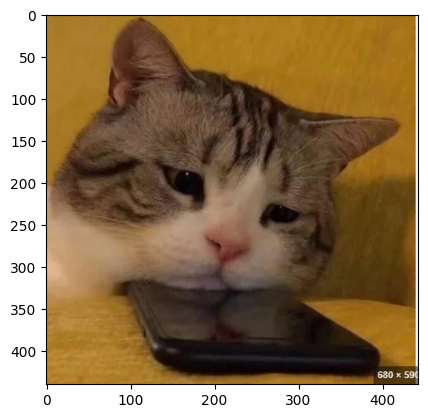

In [3]:
plt.imshow(img)
plt.show()

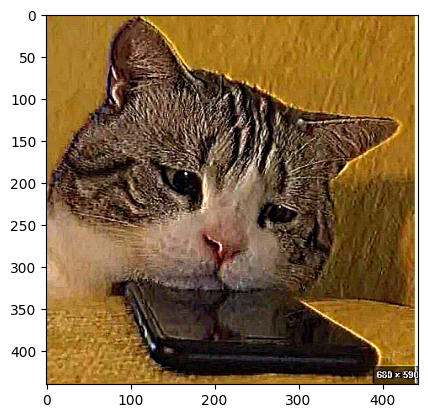

In [4]:
# applying the Kernel filter
img2 = img.filter(ImageFilter.Kernel((3, 3),
      (-1, -1, -1, -1, -1, 9, -1, -1, -1), 1, 0))
plt.imshow(img2)
plt.show()

#### The applied 3x3 kernel is a sharpening filter designed to enhance edges by amplifying the central pixel while subtracting the influence of surrounding pixels. This high-pass filter emphasizes details and makes transitions more pronounced, resulting in a crisper image. In the output, features like the kitten’s fur and eyes appear sharper, correctly reflecting the filter's purpose.

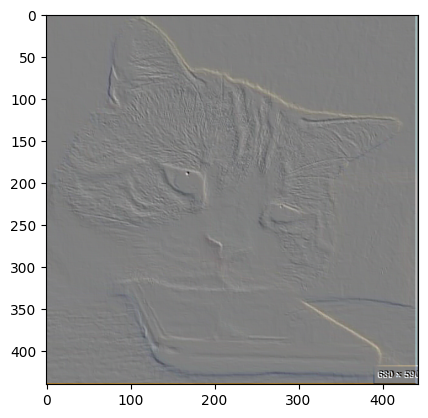

In [5]:
# Apply EMBOSS filter to the image
image_emboss = img.filter(filter=ImageFilter.EMBOSS)
plt.imshow(image_emboss)
plt.show()

#### The EMBOSS filter highlights edges and creates a 3D relief effect by enhancing intensity gradients, resulting in a grayscale image with raised or sunken edges. In the output, the kitten's outlines and textures are emphasized, while flat areas appear smoothed, demonstrating the filter's purpose of edge detection and texture enhancement.

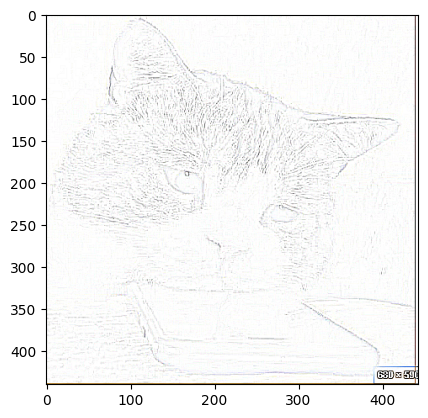

In [6]:
# Apply CONTOUR filter to the image
image_contour = img.filter(filter=ImageFilter.CONTOUR)
plt.imshow(image_contour)
plt.show()

#### The CONTOUR filter emphasizes the edges and boundaries within an image, creating a sketch-like effect by highlighting intensity transitions. In the output, the kitten’s features are outlined, with distinct boundaries making the image appear sketch-like.

### Question 2

In [ ]:
# Importing all necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K


#### Classification between images of Apples and Tomatoes

In [ ]:
img = Image.open("data/train/apples/img_p1_10.jpeg")

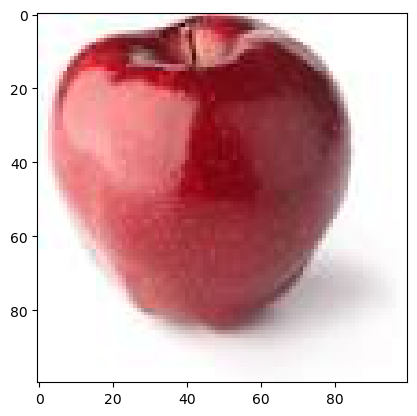

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
img.mode

'RGB'

In [ ]:
#Get pixel data for each channel
M = np.asarray(img)
M.shape

(100, 100, 3)

In [ ]:
### Every image in the dataset is of the size 224*224.
img_width, img_height = 100, 100

In [ ]:
### More settings
train_data_dir = 'data/train'
test_data_dir = 'data/test'
nb_train_samples = 294
nb_test_samples = 97
epochs = 25
batch_size = 16

In [ ]:
K.image_data_format()

'channels_last'

In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

#### Architecture

- Conv2D is the layer to convolve the image into multiple images using filter/kernel <br>
- Activation is the activation function to enhance the images. <br>
- MaxPooling2D is used to max pool the value from the given size matrix and same is used for the next 2 layers. <br>
- Flatten is used to flatten the dimensions of the image obtained after convolving it. <br>
- Dense is used to make this a fully connected model and is the hidden layer. (Deep Learning neural network) <br>
- Dropout is used to avoid overfitting on the dataset. <br>
- Dense is the output layer contains only one neuron which decide to which category image belongs. <br>

In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64)) #fully connected deep learning network
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1)) #output layer
model.add(Activation('sigmoid'))

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compiler

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#### Data Generator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size)

Found 294 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.5116 - loss: 0.7360

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 351ms/step - accuracy: 0.5114 - loss: 0.7345 - val_accuracy: 0.5729 - val_loss: 0.6693
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6875 - loss: 0.6566 - val_accuracy: 1.0000 - val_loss: 0.5515
Epoch 3/25
 1/18 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.6250 - loss: 0.6842

C:\Program Files\Anaconda\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.5791 - loss: 0.6895 - val_accuracy: 0.6562 - val_loss: 0.6344
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4375 - loss: 0.7654 - val_accuracy: 1.0000 - val_loss: 0.4401
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.5572 - loss: 0.6736 - val_accuracy: 0.6667 - val_loss: 0.6401
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6875 - loss: 0.6147 - val_accuracy: 1.0000 - val_loss: 0.4923
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.6571 - loss: 0.6409 - val_accuracy: 0.6875 - val_loss: 0.5976
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6250 - loss: 0.6194 - val_accuracy: 1.0000 - val_loss: 0.3873
Epoch 9/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.6544 - loss: 0.6302 - val_accuracy: 0.6667 - val_loss: 0.5824
Epoch 10/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8125 - loss: 0.4670 - val_accuracy: 1.0000 - val_loss: 0.2

#### The best accuracy for training was at 0.8750 for epoch 25, while the best validation accuracy was 1.000 at multiple epochs but initially at 2.

In [ ]:
model.save('apple_tomato_model.keras')

### Predicting on New Images

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np

from keras.models import load_model

model = load_model('apple_tomato_model.keras')

In [ ]:
# Apple 1st image
image = load_img('data/new/apples/apple-1.webp', target_size=(100, 100))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,100,100,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Apples"
else:
    out = "1 - Tomatoes"

print("Class (0-Apples , 1-Tomatoess) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Class (0-Apples , 1-Tomatoess) and prediction is:  0 - Apples


In [ ]:
# Apple 2nd image
image = load_img('data/new/apples/apple-2.jpg', target_size=(100, 100))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,100,100,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Apples"
else:
    out = "1 - Tomatoes"

print("Class (0-Apples , 1-Tomatoess) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Class (0-Apples , 1-Tomatoess) and prediction is:  1 - Tomatoes


In [ ]:
# Apple 3rd image
image = load_img('data/new/apples/apple-3.jfif', target_size=(100, 100))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,100,100,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Apples"
else:
    out = "1 - Tomatoes"

print("Class (0-Apples , 1-Tomatoess) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Class (0-Apples , 1-Tomatoess) and prediction is:  0 - Apples


#### For 3 new images of apples, 2 of them were accuractely classified, however, one image was incorrectly classified as tomatoes.

In [ ]:
# Tomato 1st image
image = load_img('data/new/tomatoes/tomato-1.webp', target_size=(100, 100))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,100,100,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Apples"
else:
    out = "1 - Tomatoes"

print("Class (0-Apples , 1-Tomatoess) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Class (0-Apples , 1-Tomatoess) and prediction is:  1 - Tomatoes


In [ ]:
# Tomato 2nd image
image = load_img('data/new/tomatoes/tomato-2.webp', target_size=(100, 100))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,100,100,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Apples"
else:
    out = "1 - Tomatoes"

print("Class (0-Apples , 1-Tomatoess) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Class (0-Apples , 1-Tomatoess) and prediction is:  0 - Apples


In [ ]:
# Tomato 3rd image
image = load_img('data/new/tomatoes/tomato-3.webp', target_size=(100, 100))

img = np.array(image)
img = img / 255.0
img = img.reshape(1,100,100,3)
label = model.predict(img)

if (label[0][0] < 0.5):
    out = "0 - Apples"
else:
    out = "1 - Tomatoes"

print("Class (0-Apples , 1-Tomatoess) and prediction is: ", out)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Class (0-Apples , 1-Tomatoess) and prediction is:  1 - Tomatoes


#### Similarly, for 3 new images of tomatoes, 2 of them were accuractely classified, however, one image was incorrectly classified as apples.

#### The results from the prediction indicates that the classifier works well overall but struggles with distinguishing between tomatoes and apples in certain cases. The issue could be due to similar visual features, insufficient training data, or variations in image quality. Improving the model with more diverse data or fine-tuning could help increase accuracy.